In [10]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.utils import draw_path, generate_demonstrations, init_grid_world
from src.deepmaxent_irl_gridword import run_deepmaxent_irl
from src.maxent_irl_gridworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

## Maxent

In [2]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--width 6
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)
coor_rates = [
    ((args.height-2, args.width-2), 1.0), 
    # ((0, args.width-1), 0.5), 
    # ((1, 1), 0.5)
]
init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

test
start positions:  [[5, 3]]


In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.1
--n_iters 100
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, coor_rates, init_start_pos=init_start_pos)

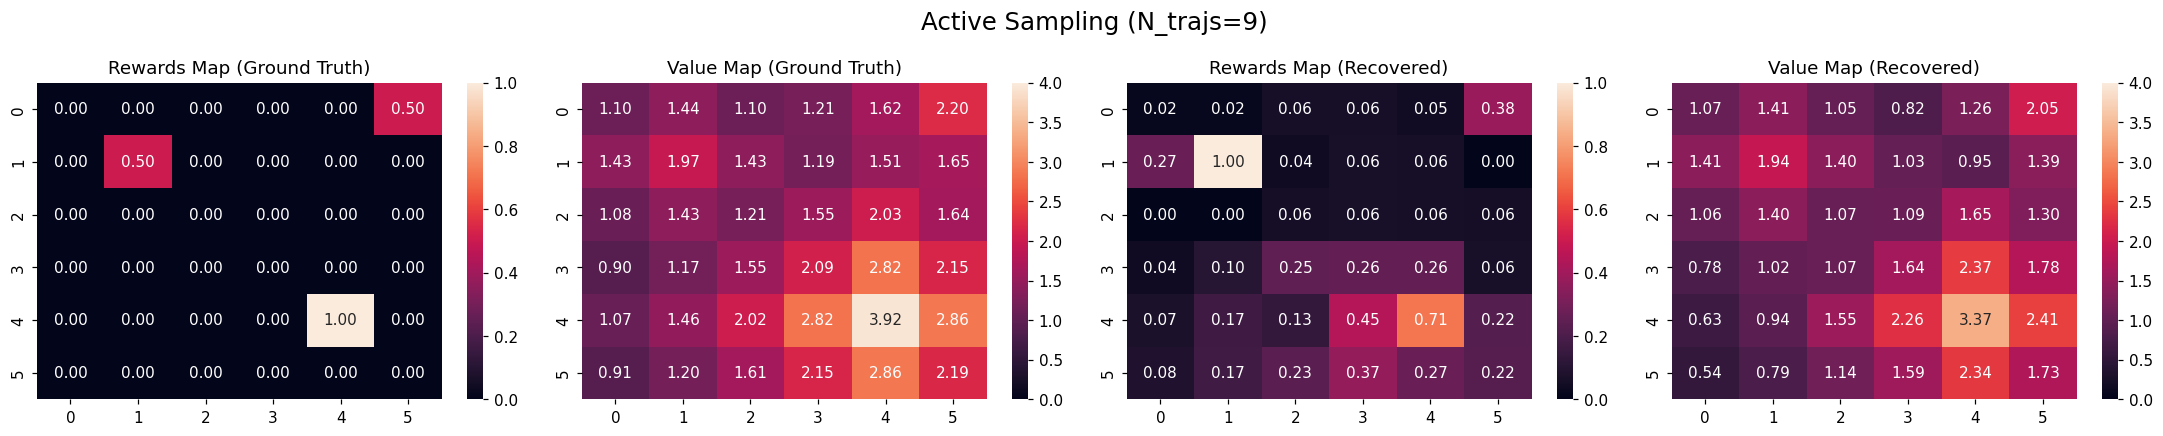

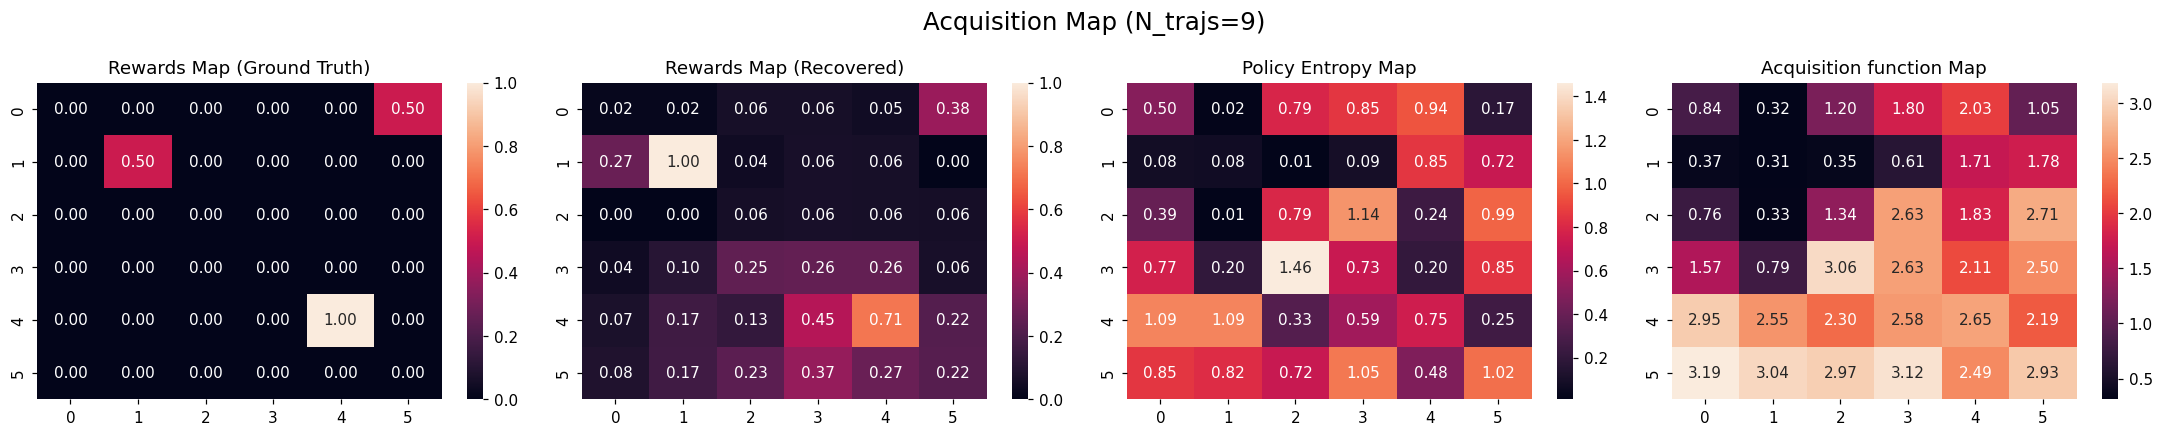

In [24]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [3]:
init_start_pos

[[5, 3]]

In [29]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.01
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--hiddens 16 16
--device cuda
--active
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, coor_rates, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
1th trajectories.
s=(5, 3), a=r, r=0.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4)
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[2.7967489 2.9199216 3.4675915 2.9650939 3.118892  3.1181138]
 [2.7430346 3.0913298 2.855506  2.91143   2.8782048 2.7832851]
 [2.671893  2.915853  2.854193  2.6881402 3.254795  2.9825258]
 [2.9881425 3.2187335 3.2440064 2.7470675 3.0634327 2.6391249]
 [2.8841472 2.6700065 3.3077888 1.6751686 4.377028  1.5033547]
 [3.1818209 2.9762409 1.820485  1.5910923 2.9387846 1.7100954]]
--Reward Map (Recovered) when n_trajs:1--
[[0.4501 0.4929 0.6835 0.5087 0.5622 0.5619]
 [0.4314 0.5526 0.4705 0.49   0.4784 0.4454]
 [0.4066 0.4915 0.4701 0.4123 0.6095 0.5147]
 [0.5167 0.5969 0.6057 0.4328 0.5429 0.3952]
 [0.4805 0.406  0.6279 0.0598 1.     0.    ]
 [0.5841 0.5125 0.1104 0.0305 0.4995 0.0719]]
[INFO - n_trajs:1] Policy evaluation
[INFO - n_trajs:1] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:1--
[[1.1592 0.9716 0.8971 1.2888 2.2145 2.8535]
 [2.2763 2.3271 1.0745 1.8704 0.4672 1.4629]
 [2.7797 2.5213 1.9001 0.5459 0.2094 0.5098]
 [2.1286 1.9758 1.4985 0

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[2.184884   2.3805342  2.0359359  1.9982276  1.1701093  1.2967964 ]
 [2.1633203  2.3609512  2.519939   2.0170715  0.95453256 1.7684926 ]
 [1.8986162  2.2403557  2.273226   2.2543564  1.1061184  2.5793483 ]
 [2.218973   2.345878   2.2675295  2.0691817  1.6904743  2.933618  ]
 [2.3338242  2.2546527  2.2124999  1.3828506  3.3810918  3.2183447 ]
 [1.9554592  2.0322175  0.9423774  1.1080109  2.382063   1.1028032 ]]
--Reward Map (Recovered) when n_trajs:2--
[[0.5095 0.5897 0.4484 0.433  0.0934 0.1453]
 [0.5007 0.5817 0.6469 0.4407 0.005  0.3388]
 [0.3921 0.5322 0.5457 0.538  0.0671 0.6712]
 [0.5235 0.5755 0.5434 0.462  0.3068 0.8165]
 [0.5706 0.5381 0.5208 0.1806 1.     0.9333]
 [0.4154 0.4469 0.     0.0679 0.5903 0.0658]]
[INFO - n_trajs:2] Policy evaluation
[INFO - n_trajs:2] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:2--
[[3.903  4.1366 3.8776 3.4526 2.5802 0.7187]
 [4.0699 4.5325 4.2807 3.0276 1.0711 1.0122]
 [4.2426 4.3533 3.7593 1.896  1.2

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[2.365026   1.5074713  1.5009613  1.6214505  0.8618175  1.5870407 ]
 [1.0696217  1.6792969  3.0023751  1.2259835  0.87494373 1.6870263 ]
 [1.5204737  1.5289025  3.1975648  3.3588703  1.4371709  2.9017992 ]
 [1.6015627  1.5531096  0.9699286  3.6237633  3.3519354  3.414105  ]
 [1.4422641  1.47588    1.0368652  1.4621035  3.800226   3.66438   ]
 [1.777802   1.4946299  1.2224265  1.0037187  2.4995265  1.1692048 ]]
--Reward Map (Recovered) when n_trajs:3--
[[0.5116 0.2197 0.2175 0.2585 0.     0.2468]
 [0.0707 0.2782 0.7285 0.1239 0.0045 0.2808]
 [0.2242 0.227  0.7949 0.8498 0.1958 0.6942]
 [0.2518 0.2353 0.0368 0.9399 0.8474 0.8686]
 [0.1975 0.209  0.0596 0.2043 1.     0.9538]
 [0.3117 0.2154 0.1227 0.0483 0.5573 0.1046]]
[INFO - n_trajs:3] Policy evaluation
[INFO - n_trajs:3] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:3--
[[1.7511 1.139  0.6828 0.9987 1.8088 0.8841]
 [0.4764 0.673  1.0404 1.3092 1.5537 1.3442]
 [0.6228 0.9567 1.4855 1.9895 2.0

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[1.9658927  1.4799223  1.3220627  1.290631   1.2732023  1.3974795 ]
 [1.6242093  1.2252935  2.5508902  1.1593511  1.02163    1.9300996 ]
 [1.2818521  0.8911655  2.8909333  2.981393   1.3919319  2.5163376 ]
 [1.3086224  1.2873067  0.80738616 3.118624   3.2767782  2.6494825 ]
 [1.5771903  1.0951089  1.2501711  1.3612744  3.2635043  3.0046575 ]
 [1.3108239  1.5917989  1.117654   1.1197426  2.5013194  0.98838675]]
--Reward Map (Recovered) when n_trajs:4--
[[0.4691 0.2723 0.2084 0.1957 0.1886 0.239 ]
 [0.3308 0.1692 0.706  0.1425 0.0868 0.4547]
 [0.1921 0.0339 0.8437 0.8804 0.2367 0.6921]
 [0.203  0.1943 0.     0.936  1.     0.746 ]
 [0.3117 0.1165 0.1793 0.2243 0.9946 0.8898]
 [0.2039 0.3177 0.1256 0.1265 0.686  0.0733]]
[INFO - n_trajs:4] Policy evaluation
[INFO - n_trajs:4] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:4--
[[2.2914 1.2667 0.703  0.9667 1.7449 0.8428]
 [0.6074 0.7014 1.0786 1.3605 1.6375 1.2921]
 [0.6469 0.9999 1.5924 2.0775 2.2

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[3.064033  1.9417806 1.5137677 2.0370686 1.5290931 1.6241486]
 [1.9167639 1.6959589 3.3453424 2.0506392 1.8663269 2.1813452]
 [1.9713916 1.8557752 3.5626256 3.881494  1.766296  3.1730235]
 [1.7331877 1.8947636 1.5727633 3.7856138 3.712365  3.0270407]
 [2.1976173 1.983576  1.8357497 1.7651287 4.0669603 3.6428628]
 [1.9271016 1.8873534 1.7251797 1.7874767 2.5795588 1.9338423]]
--Reward Map (Recovered) when n_trajs:5--
[[0.6072 0.1676 0.     0.205  0.006  0.0432]
 [0.1578 0.0714 0.7174 0.2103 0.1381 0.2615]
 [0.1792 0.134  0.8025 0.9274 0.0989 0.6499]
 [0.0859 0.1492 0.0231 0.8898 0.8611 0.5927]
 [0.2678 0.184  0.1261 0.0984 1.     0.8339]
 [0.1619 0.1463 0.0828 0.1072 0.4174 0.1645]]
[INFO - n_trajs:5] Policy evaluation
[INFO - n_trajs:5] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:5--
[[0.3192 1.4152 1.0081 1.2874 1.9755 0.8711]
 [1.1092 1.0235 1.4901 1.8825 2.2138 1.2631]
 [0.9569 1.3894 2.0793 2.7452 2.2593 1.825 ]
 [1.7831 1.8853 2.0503 2

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[2.2431266 1.9645579 1.3373498 1.6035578 1.1671445 1.5031898]
 [1.279995  1.4919735 2.953534  3.2334824 1.167909  2.1278005]
 [1.6643502 1.4432437 3.4070954 3.4290872 3.0244431 2.5584278]
 [1.7989925 1.3068359 1.1187814 2.979959  3.1093614 2.8146336]
 [1.6584537 1.7282014 1.4059023 1.4103224 3.392107  2.9671974]
 [1.6347944 1.7454239 1.3763905 1.3736808 2.3837767 1.5922889]]
--Reward Map (Recovered) when n_trajs:6--
[[0.4867 0.3661 0.0946 0.2098 0.0209 0.1664]
 [0.0698 0.1615 0.7942 0.9153 0.0213 0.4367]
 [0.2361 0.1404 0.9905 1.     0.8249 0.6231]
 [0.2944 0.0814 0.     0.8056 0.8616 0.734 ]
 [0.2336 0.2638 0.1243 0.1262 0.984  0.8001]
 [0.2234 0.2712 0.1115 0.1103 0.5475 0.205 ]]
[INFO - n_trajs:6] Policy evaluation
[INFO - n_trajs:6] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:6--
[[1.9872 1.9221 1.6055 1.5102 1.5895 0.8782]
 [1.1099 1.5863 2.3364 2.2149 2.1948 1.3303]
 [1.084  1.6265 2.4157 2.7724 2.3015 1.9418]
 [1.3869 1.7864 1.991  2

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[2.4751546 1.6111182 1.4919324 1.64671   1.6137831 1.4606812]
 [1.8004417 1.0500109 3.0502772 3.2673512 1.4221187 2.073852 ]
 [1.677982  1.369985  3.5427856 3.5788727 2.7778084 2.7023778]
 [1.8738909 1.9335384 1.3844193 2.9780905 3.0232625 2.8909647]
 [1.8651718 1.8451815 1.8145438 1.6670618 3.6257937 3.0241642]
 [1.9630193 1.875855  1.368521  1.591001  3.2578962 1.49896  ]]
--Reward Map (Recovered) when n_trajs:7--
[[0.5533 0.2178 0.1716 0.2317 0.2189 0.1594]
 [0.2913 0.     0.7766 0.8608 0.1445 0.3975]
 [0.2438 0.1242 0.9678 0.9818 0.6708 0.6415]
 [0.3199 0.343  0.1298 0.7485 0.7661 0.7147]
 [0.3165 0.3087 0.2968 0.2396 1.     0.7664]
 [0.3545 0.3206 0.1237 0.21   0.8572 0.1743]]
[INFO - n_trajs:7] Policy evaluation
[INFO - n_trajs:7] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:7--
[[1.6434 1.1294 1.3167 1.2324 1.5998 0.9717]
 [1.1268 1.3178 1.9545 1.786  1.5365 1.3947]
 [0.9906 1.4441 2.1258 2.2983 1.722  2.0253]
 [1.4712 1.7324 1.6469 1

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[2.191298  1.3626776 1.3604945 1.7086248 1.19645   1.5575846]
 [1.2862418 1.4504949 2.740477  3.1520236 1.0819476 1.8566058]
 [1.6303706 1.3749557 3.168431  3.190636  2.8709245 2.44733  ]
 [1.8126559 1.6344012 1.2211123 3.0358076 2.8555555 2.564986 ]
 [1.0574014 1.4407198 1.3214931 1.3739967 3.5043964 2.9539843]
 [1.2123234 1.9616841 2.4038363 2.3463855 3.210097  1.3652735]]
--Reward Map (Recovered) when n_trajs:8--
[[0.4634 0.1248 0.1239 0.2661 0.0568 0.2044]
 [0.0935 0.1606 0.6878 0.856  0.01   0.3266]
 [0.2342 0.1298 0.8627 0.8718 0.7411 0.568 ]
 [0.3086 0.2358 0.0669 0.8085 0.7348 0.6161]
 [0.     0.1566 0.1079 0.1294 1.     0.7751]
 [0.0633 0.3695 0.5502 0.5268 0.8797 0.1258]]
[INFO - n_trajs:8] Policy evaluation
[INFO - n_trajs:8] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:8--
[[2.4125 2.1561 2.0001 2.0348 1.653  1.219 ]
 [1.3747 1.9649 2.9107 3.0056 2.6984 1.7848]
 [1.396  2.0495 3.0179 3.7133 2.7614 2.5481]
 [2.21   2.4328 2.7901 2

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[2.765239  2.0644243 1.6679208 2.2418678 1.6715789 1.53858  ]
 [1.764279  1.239369  3.6810253 3.783292  1.6913967 2.6754675]
 [1.9404451 1.8934821 3.8840911 3.7517562 3.2872267 3.1820164]
 [1.6976181 1.9444991 1.7516317 3.527647  3.7791216 3.1914365]
 [1.4716587 1.44656   2.0037205 1.6305935 4.412598  3.5147185]
 [1.9825809 2.242736  2.8656383 2.9670722 3.7288504 3.2672086]]
--Reward Map (Recovered) when n_trajs:9--
[[0.4809 0.26   0.1351 0.3159 0.1362 0.0943]
 [0.1654 0.     0.7695 0.8017 0.1425 0.4526]
 [0.2209 0.2061 0.8334 0.7917 0.6454 0.6122]
 [0.1444 0.2222 0.1614 0.7211 0.8004 0.6152]
 [0.0732 0.0653 0.2409 0.1233 1.     0.717 ]
 [0.2342 0.3162 0.5125 0.5445 0.7845 0.639 ]]
[INFO - n_trajs:9] Policy evaluation
[INFO - n_trajs:9] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:9--
[[2.0408 1.535  1.8773 1.6994 1.6743 0.8398]
 [1.3996 1.8532 2.6897 2.3751 1.5792 1.1446]
 [1.221  1.7373 2.4889 2.5542 0.8088 1.5864]
 [1.4819 1.4794 1.2964 0

  0%|          | 0/20 [00:00<?, ?it/s]

unnormed rewards
[[2.7678032 1.6974351 1.5016963 1.7814151 1.6717411 1.6411371]
 [1.5222924 1.7981339 2.3747458 3.531328  1.3015747 2.303962 ]
 [1.4689114 1.3370911 4.0786285 3.7317615 3.2577295 2.8726916]
 [1.8221984 1.8482723 1.4497746 3.7964556 3.9153647 3.0485344]
 [1.8381407 1.6223663 1.3791425 1.6287025 4.3282704 3.6777694]
 [1.487129  2.0254178 2.7322512 3.0105386 3.778138  3.0024705]]
--Reward Map (Recovered) when n_trajs:10--
[[0.4844 0.1308 0.0661 0.1585 0.1223 0.1122]
 [0.0729 0.1641 0.3546 0.7367 0.     0.3312]
 [0.0553 0.0117 0.9175 0.8029 0.6463 0.5191]
 [0.172  0.1806 0.049  0.8243 0.8636 0.5772]
 [0.1773 0.106  0.0256 0.1081 1.     0.7851]
 [0.0613 0.2392 0.4727 0.5646 0.8182 0.562 ]]
[INFO - n_trajs:10] Policy evaluation


In [30]:
history_deepmaxent_active[9]['policy'].round(3)[-10:]#.argmax(axis=1).reshape(6, 6, order='F')

array([[0.   , 0.005, 0.993, 0.   , 0.002],
       [0.   , 0.   , 0.974, 0.   , 0.025],
       [0.007, 0.   , 0.023, 0.025, 0.945],
       [0.   , 0.   , 0.022, 0.955, 0.022],
       [0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   ],
       [0.008, 0.369, 0.616, 0.   , 0.008],
       [0.003, 0.785, 0.209, 0.   , 0.003],
       [0.007, 0.986, 0.   , 0.   , 0.007],
       [0.006, 0.757, 0.006, 0.226, 0.006]])

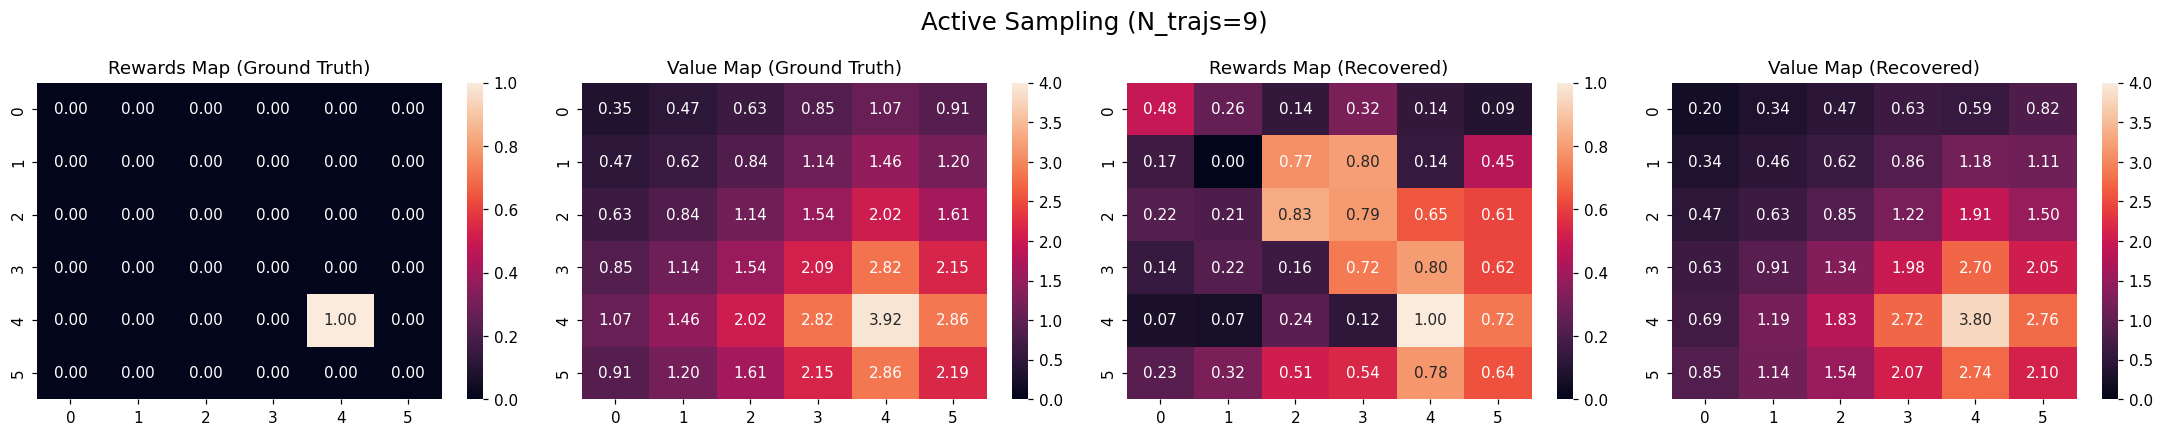

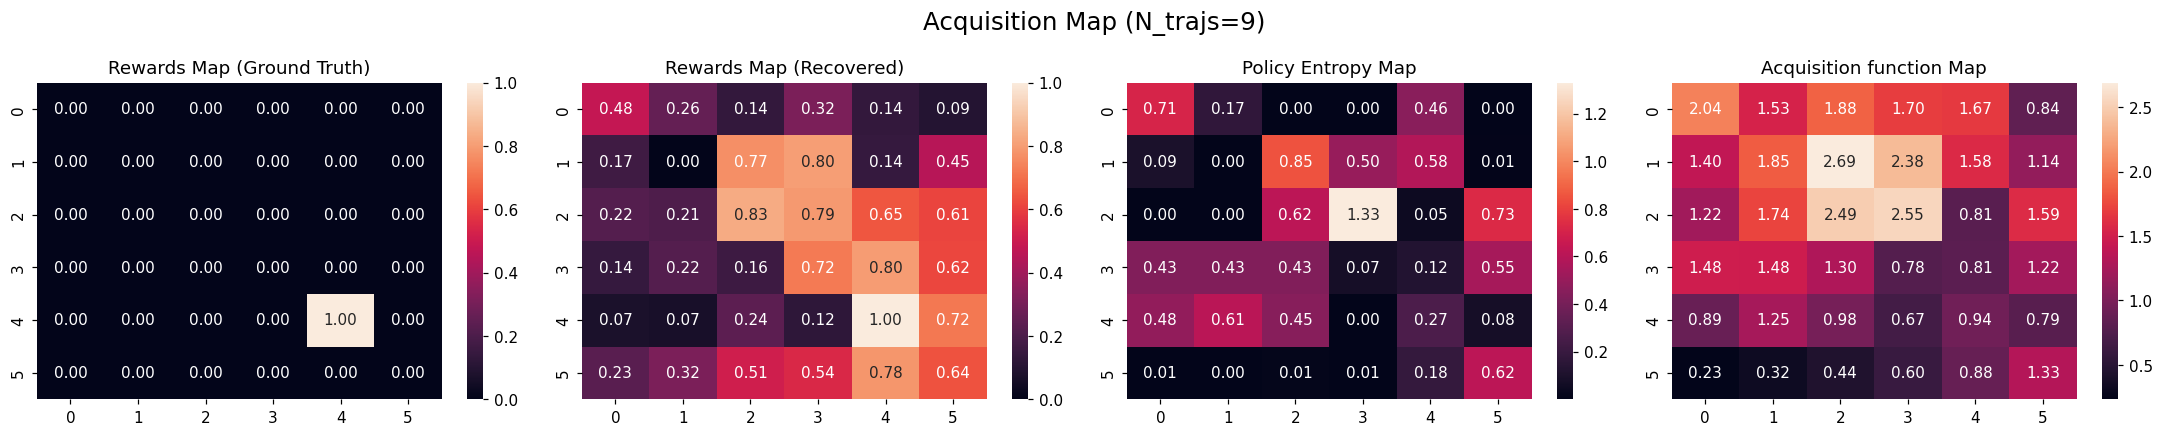

In [31]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)